In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

## Reading Data 

In [2]:
ar=pd.read_excel('D:/Data/Datasets/Data_Train.xlsx')
ar.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## Checking Information about Data

In [3]:
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Checking for Null Values

In [4]:
ar.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### Filling Null values with appropriate values 

In [5]:
ar.Route = ar.Route.fillna(ar.Route.mode()[0])

In [6]:
ar.Total_Stops = ar.Total_Stops.fillna(ar.Total_Stops.mode()[0])

In [7]:
ar.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

#### Making DataFrame clear and simple to operate

In [8]:
## Converting Arrival_Time's format    hh:mm:ss dd --> hh:mm:ss
z=[]
for i in ar.Arrival_Time:
    x=''
    for j in i:
        if j==' ':
            break
        else:
            x+=j
    z.append(x)

In [9]:
ar.pop('Arrival_Time')
ar.insert(6,'Arrival_Time',z)

In [10]:
ar.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [11]:
# Simplefying Total_Stops with integer values
ar.Total_Stops=ar.Total_Stops.map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

#### Converting columns consisting date-time data into date-time format

In [12]:
ar.Date_of_Journey=pd.to_datetime(ar.Date_of_Journey)

In [13]:
ar.Dep_Time =pd.to_datetime(ar.Dep_Time,format='%H:%M').dt.time

In [14]:
ar.Arrival_Time =pd.to_datetime(ar.Arrival_Time,format='%H:%M').dt.time

In [15]:
ar.Duration =pd.to_timedelta(ar.Duration)

In [16]:
ar.Duration

0       0 days 02:50:00
1       0 days 07:25:00
2       0 days 19:00:00
3       0 days 05:25:00
4       0 days 04:45:00
              ...      
10678   0 days 02:30:00
10679   0 days 02:35:00
10680   0 days 03:00:00
10681   0 days 02:40:00
10682   0 days 08:20:00
Name: Duration, Length: 10683, dtype: timedelta64[ns]

In [17]:
# Converting Duration Format into   hh:mm:ss
y=[]
for i in ar.Duration: 
    i=str(i)
    i=i.replace('0 days ','')
    i=i.replace('1 days ','')
    y.append(i)

In [18]:
ar.pop('Duration')
ar.insert(7,'Duration',y)

In [19]:
ar

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,02:50:00,0,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,07:25:00,2,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,19:00:00,2,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,05:25:00,1,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,04:45:00,1,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55:00,22:25:00,02:30:00,0,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45:00,23:20:00,02:35:00,0,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20:00,11:20:00,03:00:00,0,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30:00,14:10:00,02:40:00,0,No info,12648


In [20]:
ar.Duration =pd.to_datetime(ar.Duration,format='%H:%M:%S').dt.time

In [21]:
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10683 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10683 non-null  int64         
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 918.2+ KB


### After cleaning and simplefying data next part is visualizing and analysing data

In [22]:
ar.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [23]:
ar.Additional_Info=ar.Additional_Info.map({'No info':'Standard','No Info':'Standard','In-flight meal not included':'In-flight meal not included',
                                         'No check-in baggage included':'No check-in baggage included','1 Short layover':'1 Short layover',
                                         '1 Long layover':'1 Long layover', 'Change airports':'Change airports', 'Business class':'Business class',
                                          'Red-eye flight':'Red-eye flight', '2 Long layover':'2 Long layover'})

<AxesSubplot:xlabel='Price', ylabel='Additional_Info'>

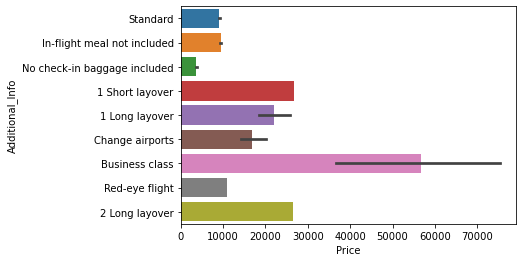

In [24]:
sns.barplot(x='Price',y='Additional_Info',data=ar)

This bar graph shows the range of money for diffrenet type of flight services provide by airlines 

In [25]:
ar.groupby(['Airline','Additional_Info']).size()

Airline                            Additional_Info             
Air Asia                           Red-eye flight                     1
                                   Standard                         318
Air India                          1 Long layover                     6
                                   1 Short layover                    1
                                   2 Long layover                     1
                                   Change airports                    7
                                   Standard                        1737
GoAir                              Standard                         194
IndiGo                             Standard                        2053
Jet Airways                        1 Long layover                    12
                                   Business class                     1
                                   In-flight meal not included     1886
                                   Standard                        1950


In [26]:
ar.iloc[np.where(ar.Additional_Info=='1 Long layover')]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1043,Air India,2019-01-03,Banglore,New Delhi,BLR → CCU → DEL,11:05:00,19:50:00,08:45:00,1,1 Long layover,14594
2079,Air India,2019-01-03,Banglore,New Delhi,BLR → AMD → DEL,00:30:00,20:30:00,20:00:00,1,1 Long layover,14752
2405,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,14:05:00,07:40:00,17:35:00,1,1 Long layover,22270
2481,Air India,2019-01-03,Banglore,New Delhi,BLR → AMD → DEL,00:30:00,23:55:00,23:25:00,1,1 Long layover,12599
2495,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,16:55:00,07:40:00,14:45:00,1,1 Long layover,26890
2556,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,16:55:00,10:25:00,17:30:00,1,1 Long layover,25735
3111,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,11:40:00,21:20:00,09:40:00,1,1 Long layover,27992
3700,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,22:50:00,09:30:00,10:40:00,1,1 Long layover,31825
3788,Air India,2019-01-03,Banglore,New Delhi,BLR → MAA → DEL,11:50:00,13:00:00,01:10:00,1,1 Long layover,15434
4521,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,16:55:00,09:00:00,16:05:00,1,1 Long layover,25735


In [27]:
ar.groupby(['Route'])['Airline'].value_counts()

Route            Airline                
BLR → AMD → DEL  Vistara                      9
                 Air India                    6
                 IndiGo                       3
BLR → BBI → DEL  Air India                    5
BLR → BDQ → DEL  Jet Airways                  8
                                           ... 
MAA → CCU        IndiGo                     184
                 SpiceJet                   128
                 Vistara                     43
                 Air India                   25
                 Vistara Premium economy      1
Name: Airline, Length: 209, dtype: int64

In [28]:
ar.groupby(['Date_of_Journey','Dep_Time'])['Arrival_Time'].value_counts()

Date_of_Journey  Dep_Time  Arrival_Time
2019-01-03       00:20:00  13:20:00        1
                           15:30:00        1
                 00:30:00  20:30:00        1
                           23:55:00        1
                 02:30:00  04:00:00        1
                                          ..
2019-12-06       22:50:00  04:25:00        1
                           12:35:00        1
                 23:30:00  02:20:00        1
                           04:35:00        1
                 23:55:00  02:45:00        1
Name: Arrival_Time, Length: 8764, dtype: int64

In [29]:
ar

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,02:50:00,0,Standard,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,07:25:00,2,Standard,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,19:00:00,2,Standard,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,05:25:00,1,Standard,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,04:45:00,1,Standard,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55:00,22:25:00,02:30:00,0,Standard,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45:00,23:20:00,02:35:00,0,Standard,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20:00,11:20:00,03:00:00,0,Standard,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30:00,14:10:00,02:40:00,0,Standard,12648


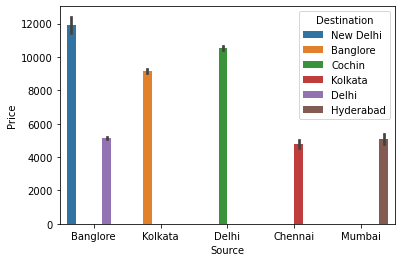

In [30]:
sns.barplot(x='Source',y='Price',data=ar,hue='Destination');

This bar graph shows price range for diffrent sources and destination of flights

eg- Banglore --> New Delhi has highest price range and Chennai --> Kolkata has lowest 

In [31]:
ar['month']=pd.DatetimeIndex(ar.Date_of_Journey	).month
ar['day'] = pd.DatetimeIndex(ar.Date_of_Journey	).day
ar.groupby(['month'])['day'].max().reset_index()

,month,day
0,1,6
1,3,27
2,4,27
3,5,27
4,6,27
5,9,6
6,12,6


In [32]:
ar

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,02:50:00,0,Standard,3897,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,07:25:00,2,Standard,7662,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,19:00:00,2,Standard,13882,9,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,05:25:00,1,Standard,6218,12,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,04:45:00,1,Standard,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55:00,22:25:00,02:30:00,0,Standard,4107,9,4
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45:00,23:20:00,02:35:00,0,Standard,4145,4,27
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20:00,11:20:00,03:00:00,0,Standard,7229,4,27
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30:00,14:10:00,02:40:00,0,Standard,12648,1,3


In [33]:
ar.groupby(['month','day','Airline','Price'])['Route'].value_counts()

month  day  Airline    Price  Route          
1      3    Air Asia   5620   CCU → BLR          1
                       5964   CCU → BLR          1
                       10715  BLR → DEL          1
                       10873  BLR → DEL          1
            Air India  6092   BOM → HYD          1
                                                ..
12     6    Vistara    7927   CCU → DEL → BLR    4
                       8085   CCU → DEL → BLR    2
                       8452   CCU → DEL → BLR    4
                       8610   CCU → DEL → BLR    6
                       11982  MAA → CCU          1
Name: Route, Length: 5042, dtype: int64

<AxesSubplot:xlabel='Airline'>

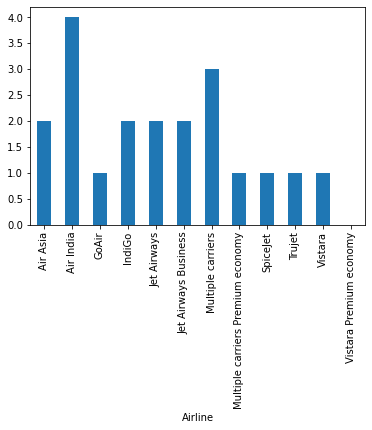

In [34]:
a=ar.groupby(['Airline'])['Total_Stops'].max()
a.plot.bar()

This graph shows total number of stops taken by flights of diffrent airlines 

<AxesSubplot:xlabel='Airline'>

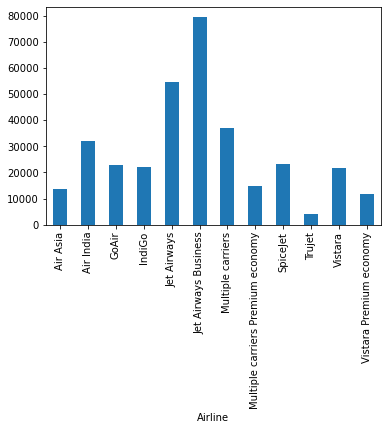

In [35]:
a=ar.groupby(['Airline'])['Price'].max()
a.plot.bar()

This graph shows price range by flights of diffrent airlines

<AxesSubplot:xlabel='Airline'>

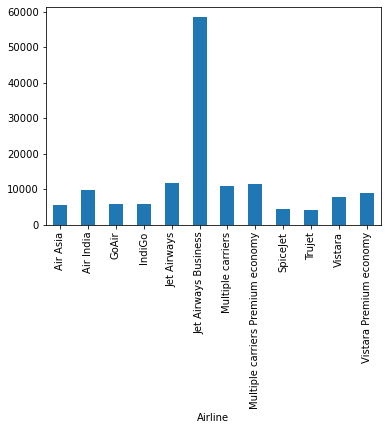

In [36]:
a=ar.groupby(['Airline'])['Price'].mean()
a.plot.bar()

This graph shows average price range of flights of diffrent airlines

In [37]:
c=ar.Duration.apply(lambda x:str(x)[:5])
c

0        02:50
1        07:25
2        19:00
3        05:25
4        04:45
         ...  
10678    02:30
10679    02:35
10680    03:00
10681    02:40
10682    08:20
Name: Duration, Length: 10683, dtype: object

In [38]:
# for more visualisation converting Duration format into float
d=[]
for i in c: 
    i=i.replace(':','.')  
    i=float(i)
    d.append(i)

In [39]:
ar['durations']=pd.Series(d)

In [40]:
ar.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'month', 'day', 'durations'],
      dtype='object')

In [41]:
ar.drop(columns='Duration')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,month,day,durations
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,0,Standard,3897,3,24,2.50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,2,Standard,7662,1,5,7.25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,2,Standard,13882,9,6,19.00
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,1,Standard,6218,12,5,5.25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,1,Standard,13302,1,3,4.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55:00,22:25:00,0,Standard,4107,9,4,2.30
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45:00,23:20:00,0,Standard,4145,4,27,2.35
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20:00,11:20:00,0,Standard,7229,4,27,3.00
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30:00,14:10:00,0,Standard,12648,1,3,2.40


In [42]:
ar.groupby(['Airline','Source', 'Destination'])['durations'].mean()

Airline                            Source    Destination
Air Asia                           Banglore  Delhi           2.483803
                                             New Delhi       2.475000
                                   Delhi     Cochin          9.858750
                                   Kolkata   Banglore        5.094667
Air India                          Banglore  Delhi           2.485417
                                             New Delhi       8.433491
                                   Chennai   Kolkata         2.150000
                                   Delhi     Cochin         10.850134
                                   Kolkata   Banglore       11.143848
                                   Mumbai    Hyderabad       3.502941
GoAir                              Banglore  Delhi           2.500725
                                             New Delhi       2.839583
                                   Delhi     Cochin          6.594079
                                 

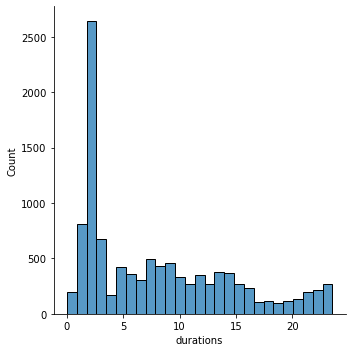

In [43]:
sns.displot(ar.durations)

This graph shows maximum duration time taken by flights of diffrent airlines

<AxesSubplot:xlabel='Airline'>

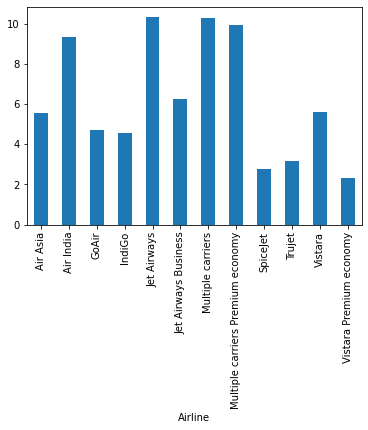

In [44]:
a=ar.groupby(['Airline'])['durations'].mean()
a.plot.bar()

This graph shows average duration time taken by flights of diffrent airlines

In [45]:
ar.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,durations
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,02:50:00,0,Standard,3897,3,24,2.50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,07:25:00,2,Standard,7662,1,5,7.25


In [46]:
x=ar.groupby(['month'])['Airline'].value_counts()

In [48]:
x=pd.DataFrame(x)

In [49]:
x=x.rename({'Airline':'count'},axis=1)

In [50]:
x

count
month Airline                 
1     Jet Airways          430
      Air India            197
      IndiGo               184
      SpiceJet              76
      Multiple carriers     75
...                        ...
12    Multiple carriers     65
      SpiceJet              54
      Vistara               52
      Air Asia              29
      GoAir                 12

[64 rows x 1 columns]

In [51]:
x=x.reset_index()

In [52]:
x

,month,Airline,count
0,1,Jet Airways,430
1,1,Air India,197
2,1,IndiGo,184
3,1,SpiceJet,76
4,1,Multiple carriers,75
...,...,...,...
59,12,Multiple carriers,65
60,12,SpiceJet,54
61,12,Vistara,52
62,12,Air Asia,29


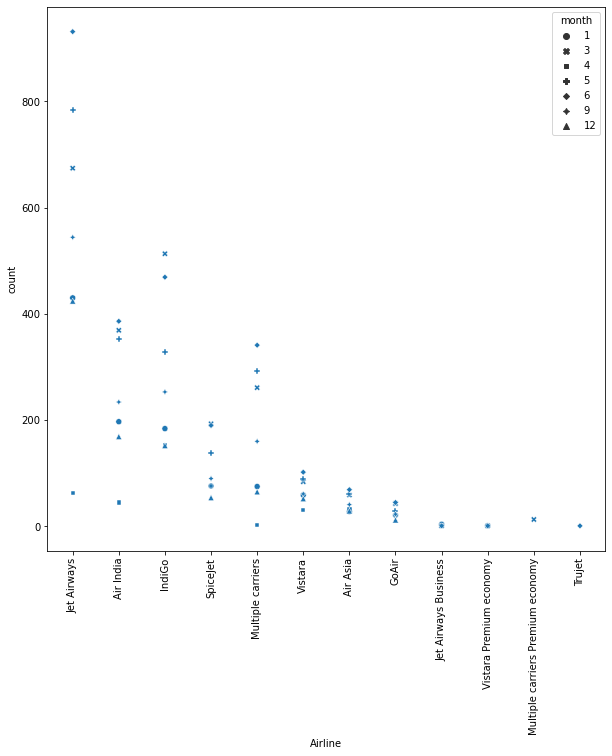

In [53]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Airline',y='count',data=x,style='month',x_jitter=False)
plt.xticks(rotation=90);

This graph shows number of flights in diffrent months by diffrent airlines

In [54]:
ar.month=ar.month.map({1:'January',3:'March',4:'April',5:'May',6:'June',9:'September',12:'December'})

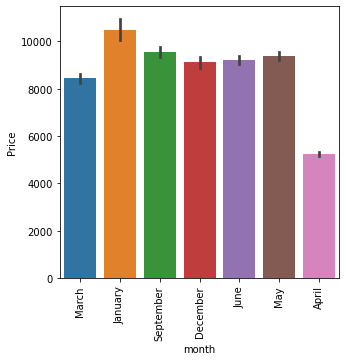

In [55]:
plt.figure(figsize=(5,5))
sns.barplot(x='month',y='Price',data=ar)
plt.xticks(rotation=90);

This graph shows price of flights in diffrent months